In [1]:
# install.packages("languageserver")
# install.packages("languageserversetup")
# install.packages('caret')
# install.packages('tree')
# install.packages('zoo')

In [2]:
library(tree)
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [3]:
X_train <- read.csv('dengue_features_train_cleaned.csv')

In [4]:
train_labels <- read.csv('dengue_labels_train.csv')
train_labels$total_cases <- as.numeric(train_labels$total_cases)

In [5]:
summary(train_labels$total_cases[train_labels$city == 'sj'])
summary(train_labels$total_cases[train_labels$city == 'iq'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    9.00   19.00   34.18   37.00  461.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   5.000   7.565   9.000 116.000 

In [6]:
library(dplyr)
X <- data.frame(X_train, train_labels$total_cases)
sj <- X[X$city == 'sj',]
iq <- X[X$city == 'iq',]
sj$label <- cut(sj$train_labels.total_cases , breaks = c(0, 19, 37, Inf), labels = c("Low", "Moderate", "High"), right = FALSE)
iq$label <- cut(iq$train_labels.total_cases , breaks = c(0, 5, 9, Inf), labels = c("Low", "Moderate", "High"), right = FALSE)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
X <- rbind(sj, iq)
X$sj <- factor(ifelse(X$city == "sj", 1, 0))
head(X)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,train_labels.total_cases,label,sj
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,sj,1990,18,30/04/1990,0.1226000,0.1037250,0.1984833,0.1776167,12.42,297.5729,...,14.01286,2.628571,25.44286,6.900000,29.4,20.0,16.0,4,Low,1
2,sj,1990,19,07/05/1990,0.1699000,0.1421750,0.1623571,0.1554857,22.82,298.2114,...,15.37286,2.371429,26.71429,6.371429,31.7,22.2,8.6,5,Low,1
3,sj,1990,20,14/05/1990,0.0322500,0.1729667,0.1572000,0.1708429,34.54,298.7814,...,16.84857,2.300000,26.71429,6.485714,32.2,22.8,41.4,4,Low,1
4,sj,1990,21,21/05/1990,0.1286333,0.2450667,0.2275571,0.2358857,15.36,298.9871,...,16.67286,2.428571,27.47143,6.771429,33.3,23.3,4.0,3,Low,1
5,sj,1990,22,28/05/1990,0.1962000,0.2622000,0.2512000,0.2473400,7.52,299.5186,...,17.21000,3.014286,28.94286,9.371429,35.0,23.9,5.8,6,Low,1
6,sj,1990,23,04/06/1990,0.1545500,0.1748500,0.2543143,0.1817429,9.58,299.6300,...,17.21286,2.100000,28.11429,6.942857,34.4,23.9,39.1,2,Low,1


In [8]:
summary(iq)

     city                year        weekofyear    week_start_date   
 Length:520         Min.   :2000   Min.   : 1.00   Length:520        
 Class :character   1st Qu.:2003   1st Qu.:13.75   Class :character  
 Mode  :character   Median :2005   Median :26.50   Mode  :character  
                    Mean   :2005   Mean   :26.50                     
                    3rd Qu.:2007   3rd Qu.:39.25                     
                    Max.   :2010   Max.   :53.00                     
    ndvi_ne           ndvi_nw           ndvi_se           ndvi_sw       
 Min.   :0.06173   Min.   :0.03586   Min.   :0.02988   Min.   :0.06418  
 1st Qu.:0.19951   1st Qu.:0.17953   1st Qu.:0.19416   1st Qu.:0.20384  
 Median :0.26353   Median :0.23285   Median :0.24976   Median :0.26187  
 Mean   :0.26360   Mean   :0.23863   Mean   :0.25000   Mean   :0.26654  
 3rd Qu.:0.32002   3rd Qu.:0.29383   3rd Qu.:0.30255   3rd Qu.:0.32488  
 Max.   :0.50836   Max.   :0.45443   Max.   :0.53831   Max.   :0.54602  

In [9]:
summary(sj)

     city                year        weekofyear    week_start_date   
 Length:936         Min.   :1990   Min.   : 1.00   Length:936        
 Class :character   1st Qu.:1994   1st Qu.:13.75   Class :character  
 Mode  :character   Median :1999   Median :26.50   Mode  :character  
                    Mean   :1999   Mean   :26.50                     
                    3rd Qu.:2003   3rd Qu.:39.25                     
                    Max.   :2008   Max.   :53.00                     
    ndvi_ne             ndvi_nw            ndvi_se            ndvi_sw        
 Min.   :-0.406250   Min.   :-0.45610   Min.   :-0.01553   Min.   :-0.06346  
 1st Qu.: 0.004267   1st Qu.: 0.01649   1st Qu.: 0.13894   1st Qu.: 0.12946  
 Median : 0.058129   Median : 0.06595   Median : 0.17652   Median : 0.16690  
 Mean   : 0.058096   Mean   : 0.06626   Mean   : 0.17709   Mean   : 0.16609  
 3rd Qu.: 0.111223   3rd Qu.: 0.11351   3rd Qu.: 0.21160   3rd Qu.: 0.20226  
 Max.   : 0.493400   Max.   : 0.43710   Ma

In [10]:
tree.sj <- tree(label ~ . - train_labels.total_cases, sj)
tree.iq <- tree(label ~ . - train_labels.total_cases, iq)
tree.X <- tree(label ~ . - train_labels.total_cases, X)

Warning message in tree(label ~ . - train_labels.total_cases, sj):
"NAs introduced by coercion"
Warning message in tree(label ~ . - train_labels.total_cases, iq):
"NAs introduced by coercion"
Warning message in tree(label ~ . - train_labels.total_cases, X):
"NAs introduced by coercion"


In [11]:
summary(tree.sj)
summary(tree.iq)
summary(tree.X)


Classification tree:
tree(formula = label ~ . - train_labels.total_cases, data = sj)
Variables actually used in tree construction:
[1] "weekofyear"                "year"                     
[3] "reanalysis_air_temp_k"     "reanalysis_max_air_temp_k"
Number of terminal nodes:  13 
Residual mean deviance:  1.338 = 1235 / 923 
Misclassification error rate: 0.2863 = 268 / 936 


Classification tree:
tree(formula = label ~ . - train_labels.total_cases, data = iq)
Variables actually used in tree construction:
 [1] "year"                                 
 [2] "weekofyear"                           
 [3] "ndvi_ne"                              
 [4] "station_precip_mm"                    
 [5] "reanalysis_air_temp_k"                
 [6] "reanalysis_specific_humidity_g_per_kg"
 [7] "reanalysis_relative_humidity_percent" 
 [8] "reanalysis_tdtr_k"                    
 [9] "station_max_temp_c"                   
[10] "precipitation_amt_mm"                 
[11] "ndvi_se"                              
Number of terminal nodes:  23 
Residual mean deviance:  1.067 = 530.3 / 497 
Misclassification error rate: 0.2308 = 120 / 520 


Classification tree:
tree(formula = label ~ . - train_labels.total_cases, data = X)
Variables actually used in tree construction:
[1] "weekofyear"                           
[2] "reanalysis_specific_humidity_g_per_kg"
[3] "year"                                 
[4] "station_max_temp_c"                   
Number of terminal nodes:  10 
Residual mean deviance:  1.681 = 2431 / 1446 
Misclassification error rate: 0.3819 = 556 / 1456 

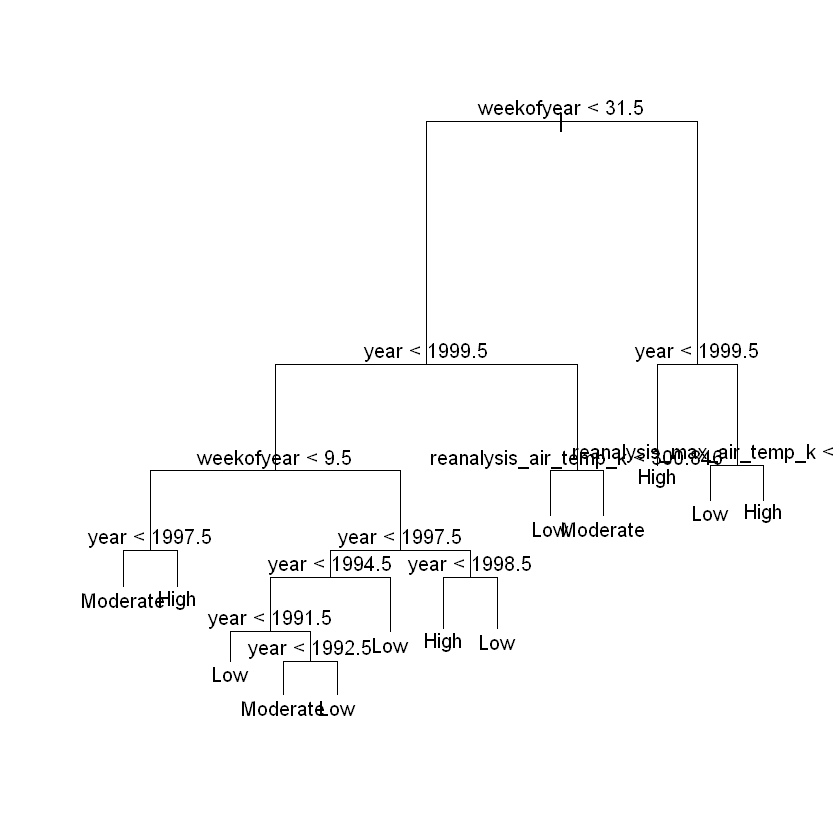

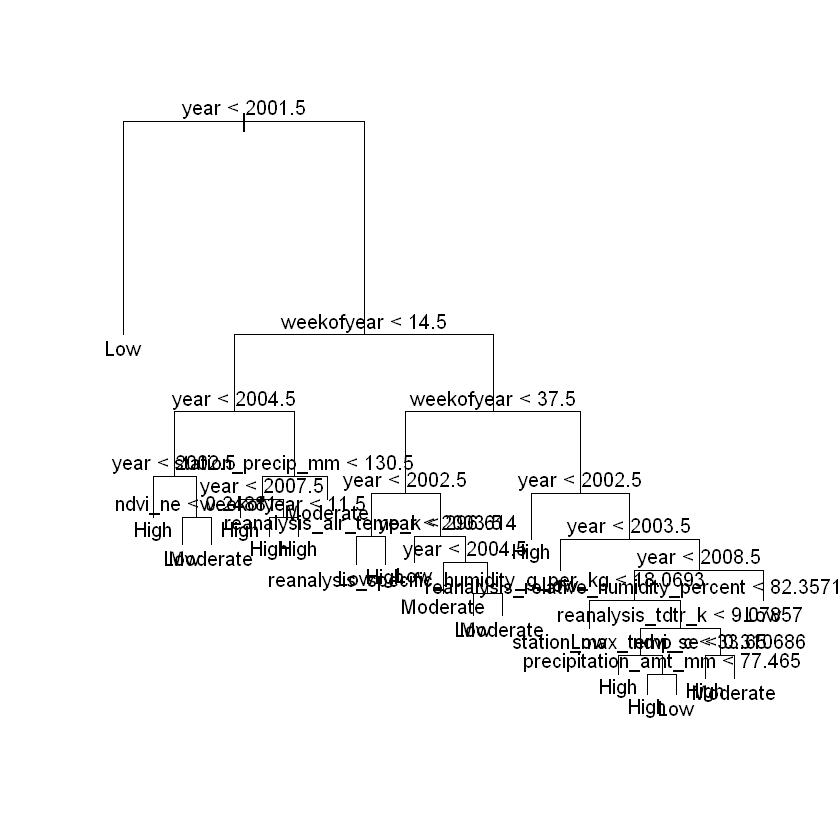

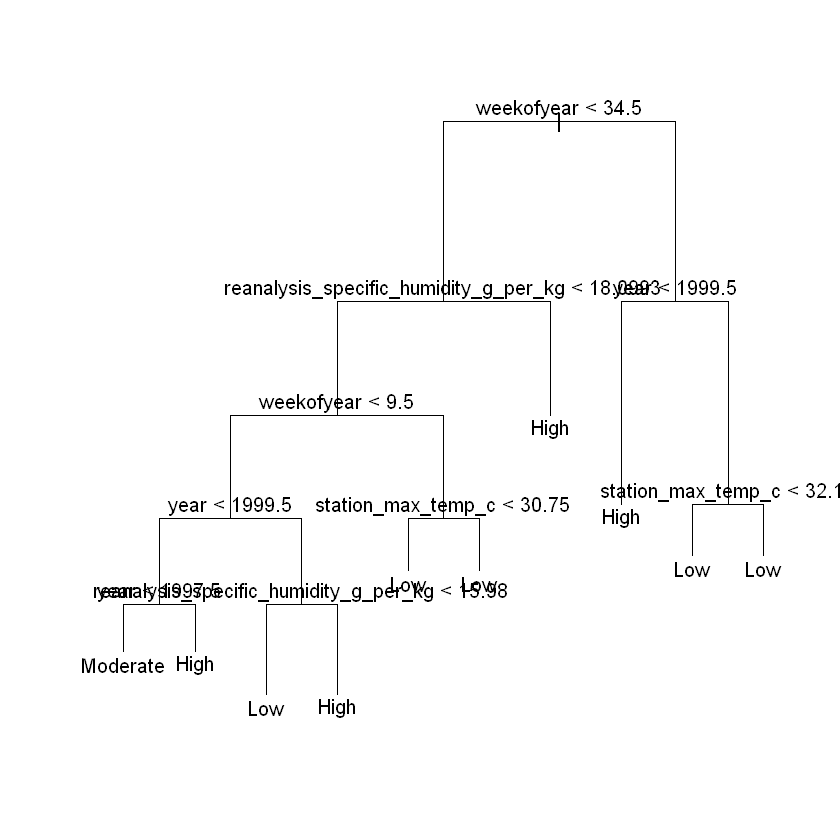

In [12]:
plot(tree.sj)
text(tree.sj)
plot(tree.iq)
text(tree.iq)
plot(tree.X)
text(tree.X)

In [13]:
set.seed(42)
X_train <- sample(1: nrow(X), round(0.8 * nrow(X)))
sj_train <- sample(1: nrow(iq), round(0.8 * nrow(iq)))
iq_train <- sample(1: nrow(sj), round(0.8 * nrow(sj)))
X_test <- X[-X_train,]
sj_test <- sj[-sj_train,]
iq_test <- iq[-iq_train,]
iq_test_labels <- iq$label[-iq_train]
sj_test_labels <- sj$label[-sj_train]
X_test_labels <- X$label[-X_train]

In [14]:
tree.X <- tree(label ~ . - city - train_labels.total_cases, X, subset = X_train)
tree.iq <- tree(label ~ . - train_labels.total_cases, iq, subset = iq_train)
tree.sj <- tree(label ~ . - train_labels.total_cases, sj, subset = sj_train)

Warning message in tree(label ~ . - city - train_labels.total_cases, X, subset = X_train):
"NAs introduced by coercion"
Warning message in tree(label ~ . - train_labels.total_cases, iq, subset = iq_train):
"NAs introduced by coercion"
Warning message in tree(label ~ . - train_labels.total_cases, sj, subset = sj_train):
"NAs introduced by coercion"


In [15]:
tree.X_pred <- predict(tree.X, X_test, type = "class")
confusionMatrix(tree.X_pred, X_test_labels)
tree.sj_pred <- predict(tree.sj, sj_test, type = "class")
confusionMatrix(tree.sj_pred, sj_test_labels)
tree.iq_pred <- predict(tree.iq, iq_test, type = "class")
confusionMatrix(tree.iq_pred, iq_test_labels)

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


Confusion Matrix and Statistics

          Reference
Prediction Low Moderate High
  Low      117       35   30
  Moderate   6       12   12
  High      17       23   39

Overall Statistics
                                          
               Accuracy : 0.5773          
                 95% CI : (0.5183, 0.6347)
    No Information Rate : 0.4811          
    P-Value [Acc > NIR] : 0.0006228       
                                          
                  Kappa : 0.2941          
                                          
 Mcnemar's Test P-Value : 4.481e-06       

Statistics by Class:

                     Class: Low Class: Moderate Class: High
Sensitivity              0.8357         0.17143      0.4815
Specificity              0.5695         0.91855      0.8095
Pos Pred Value           0.6429         0.40000      0.4937
Neg Pred Value           0.7890         0.77778      0.8019
Prevalence               0.4811         0.24055      0.2784
Detection Rate           0.4021         0

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


Confusion Matrix and Statistics

          Reference
Prediction Low Moderate High
  Low      115       23    8
  Moderate 101       21   11
  High     109       58   74

Overall Statistics
                                          
               Accuracy : 0.4038          
                 95% CI : (0.3614, 0.4474)
    No Information Rate : 0.625           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1378          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Low Class: Moderate Class: High
Sensitivity              0.3538         0.20588      0.7957
Specificity              0.8410         0.73206      0.6089
Pos Pred Value           0.7877         0.15789      0.3071
Neg Pred Value           0.4385         0.79070      0.9319
Prevalence               0.6250         0.19615      0.1788
Detection Rate           0.2212         0

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


Confusion Matrix and Statistics

          Reference
Prediction Low Moderate High
  Low       31        8    6
  Moderate   8        9    4
  High       9       11   18

Overall Statistics
                                        
               Accuracy : 0.5577        
                 95% CI : (0.457, 0.655)
    No Information Rate : 0.4615        
    P-Value [Acc > NIR] : 0.03101       
                                        
                  Kappa : 0.317         
                                        
 Mcnemar's Test P-Value : 0.27623       

Statistics by Class:

                     Class: Low Class: Moderate Class: High
Sensitivity              0.6458         0.32143      0.6429
Specificity              0.7500         0.84211      0.7368
Pos Pred Value           0.6889         0.42857      0.4737
Neg Pred Value           0.7119         0.77108      0.8485
Prevalence               0.4615         0.26923      0.2692
Detection Rate           0.2981         0.08654      0.1731

In [16]:
set.seed(42)
cv.sj <- cv.tree(tree.sj, FUN = prune.misclass)
cv.iq <- cv.tree(tree.iq, FUN = prune.misclass)
cv.X <- cv.tree(tree.X,  FUN = prune.misclass)

Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tre

In [17]:
cv.iq

$size
[1] 26 25 24 23 12 10  4  3  1

$dev
[1] 163 168 168 171 175 166 171 198 211

$k
[1]      -Inf  0.000000  1.000000  2.000000  3.000000  4.000000  5.833333
[8] 18.000000 20.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

In [18]:
cv.sj

$size
 [1] 27 23 22 20 19 17 15 14 13 10  8  4  3  2  1

$dev
 [1] 130 130 131 131 132 130 124 131 141 141 159 159 173 191 268

$k
 [1]      -Inf  0.000000  1.000000  1.500000  2.000000  2.500000  3.000000
 [8]  4.000000  5.000000  5.333333  7.500000  8.000000 11.000000 18.000000
[15] 82.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

In [19]:
cv.X

$size
[1] 13 10  7  4  3  2  1

$dev
[1] 475 475 463 474 529 576 592

$k
[1] -Inf    0    6   11   22   36   46

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

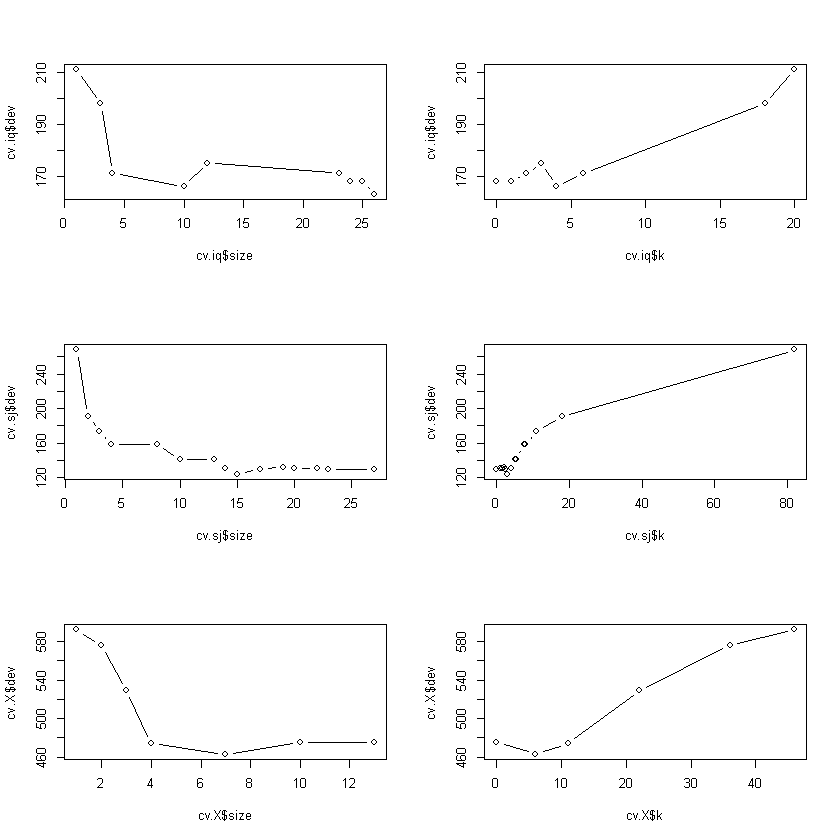

In [20]:
par(mfrow = c(3, 2))
plot(cv.iq$size, cv.iq$dev, type = "b")
plot(cv.iq$k, cv.iq$dev, type = "b")
plot(cv.sj$size, cv.sj$dev, type = "b")
plot(cv.sj$k, cv.sj$dev, type = "b")
plot(cv.X$size, cv.X$dev, type = "b")
plot(cv.X$k, cv.X$dev, type = "b")

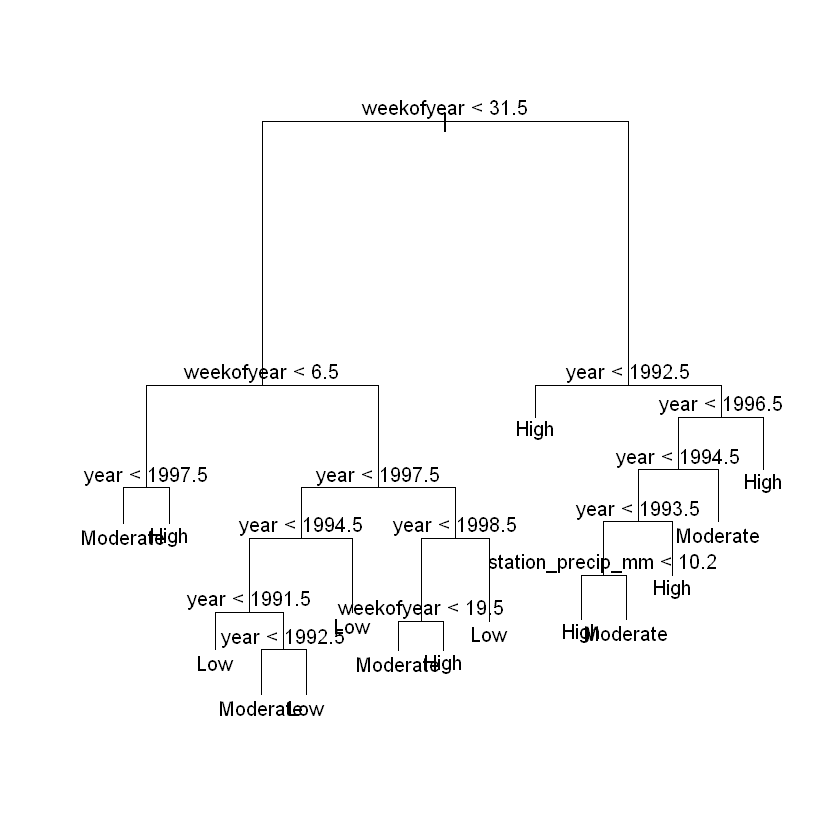

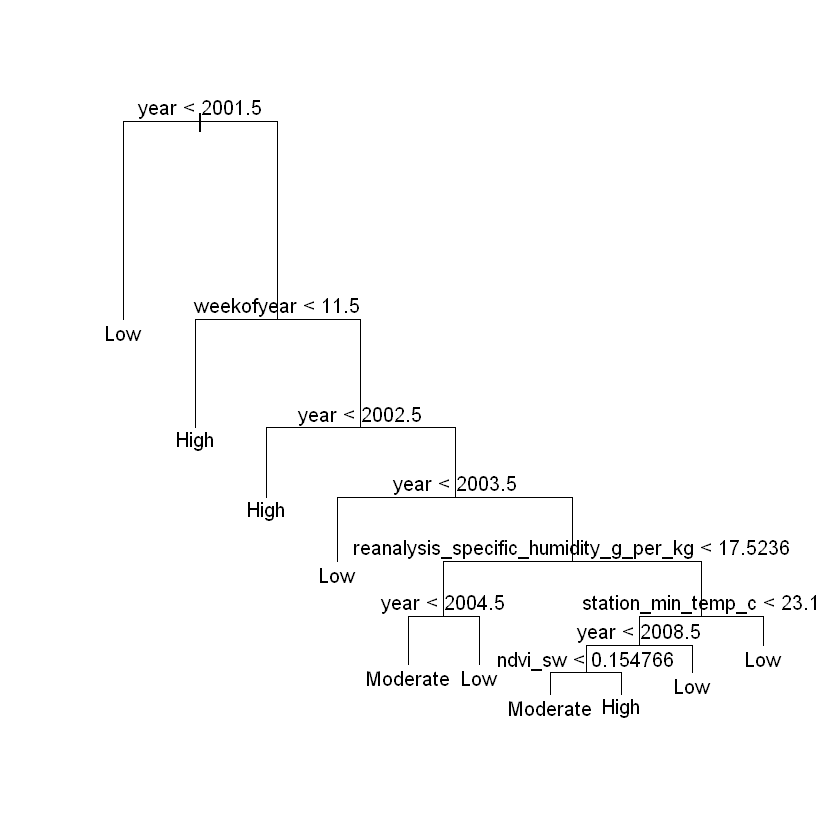

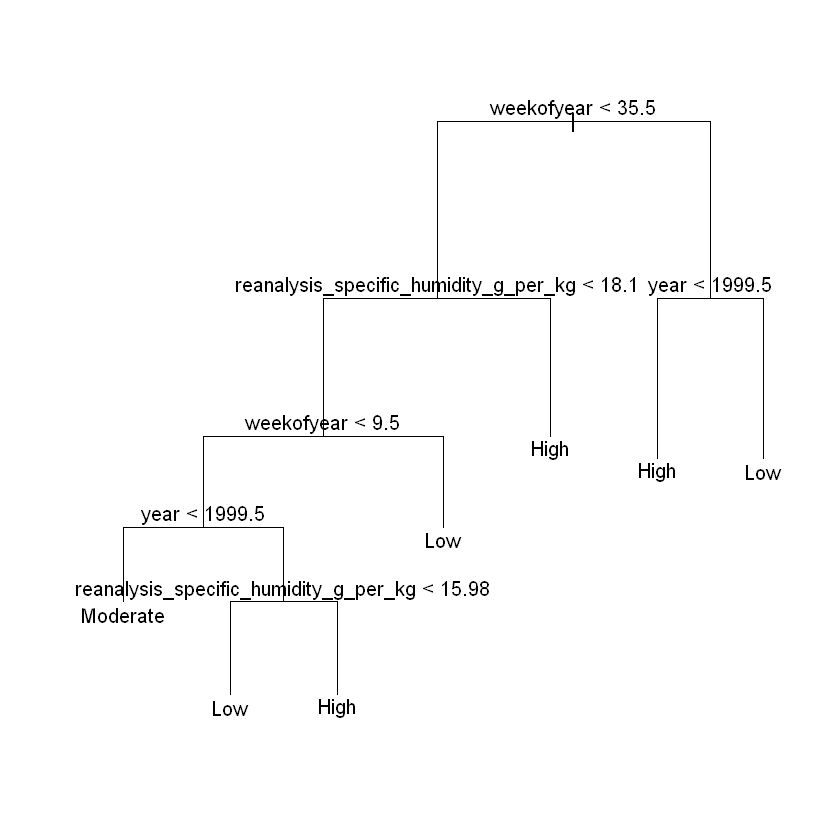

In [21]:
prune.sj <- prune.misclass(tree.sj, best = 15)
plot(prune.sj)
text(prune.sj, pretty = 0)
prune.iq <- prune.misclass(tree.iq, best = 10)
plot(prune.iq)
text(prune.iq, pretty = 0)
prune.X <- prune.misclass(tree.X, best = 7)
plot(prune.X)
text(prune.X, pretty = 0)

In [22]:
tree.X_pred <- predict(prune.X, X_test, type = "class")
table(tree.X_pred, X_test_labels)
tree.sj_pred <- predict(prune.sj, sj_test, type = "class")
table(tree.sj_pred, sj_test_labels)
tree.iq_pred <- predict(prune.iq, iq_test, type = "class")
table(tree.iq_pred, iq_test_labels)

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


           X_test_labels
tree.X_pred Low Moderate High
   Low      122       41   35
   Moderate   2        7    9
   High      16       22   37

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


            sj_test_labels
tree.sj_pred Low Moderate High
    Low      205       26    9
    Moderate   3       15    8
    High     117       61   76

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


            iq_test_labels
tree.iq_pred Low Moderate High
    Low       37       11    5
    Moderate   1        1    0
    High      10       16   23

In [23]:
summary(prune.X)
summary(prune.iq)
summary(prune.sj)


Classification tree:
snip.tree(tree = tree.X, nodes = c(7L, 9L))
Variables actually used in tree construction:
[1] "weekofyear"                           
[2] "reanalysis_specific_humidity_g_per_kg"
[3] "year"                                 
Number of terminal nodes:  7 
Residual mean deviance:  1.736 = 2010 / 1158 
Misclassification error rate: 0.388 = 452 / 1165 


Classification tree:
snip.tree(tree = tree.iq, nodes = c(6L, 125L, 253L, 14L, 505L
))
Variables actually used in tree construction:
[1] "year"                                 
[2] "weekofyear"                           
[3] "reanalysis_specific_humidity_g_per_kg"
[4] "station_min_temp_c"                   
[5] "ndvi_sw"                              
Number of terminal nodes:  10 
Residual mean deviance:  1.371 = 556.5 / 406 
Misclassification error rate: 0.2837 = 118 / 416 


Classification tree:
snip.tree(tree = tree.sj, nodes = c(8L, 21L, 29L, 82L, 15L, 9L, 
6L, 23L, 83L))
Variables actually used in tree construction:
[1] "weekofyear"        "year"              "station_precip_mm"
Number of terminal nodes:  15 
Residual mean deviance:  1.103 = 442.5 / 401 
Misclassification error rate: 0.2043 = 85 / 416 

In [24]:
confusionMatrix(iq_test_labels, tree.iq_pred)

Confusion Matrix and Statistics

          Reference
Prediction Low Moderate High
  Low       37        1   10
  Moderate  11        1   16
  High       5        0   23

Overall Statistics
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5096          
    P-Value [Acc > NIR] : 0.07034         
                                          
                  Kappa : 0.3466          
                                          
 Mcnemar's Test P-Value : 9.537e-06       

Statistics by Class:

                     Class: Low Class: Moderate Class: High
Sensitivity              0.6981        0.500000      0.4694
Specificity              0.7843        0.735294      0.9091
Pos Pred Value           0.7708        0.035714      0.8214
Neg Pred Value           0.7143        0.986842      0.6579
Prevalence               0.5096        0.019231      0.4712
Detection Rate           0.3558        0.

In [25]:
confusionMatrix(sj_test_labels, tree.sj_pred)

Confusion Matrix and Statistics

          Reference
Prediction Low Moderate High
  Low      205        3  117
  Moderate  26       15   61
  High       9        8   76

Overall Statistics
                                          
               Accuracy : 0.5692          
                 95% CI : (0.5254, 0.6123)
    No Information Rate : 0.4885          
    P-Value [Acc > NIR] : 0.0001343       
                                          
                  Kappa : 0.2988          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: Low Class: Moderate Class: High
Sensitivity              0.8542         0.57692      0.2992
Specificity              0.5714         0.82389      0.9361
Pos Pred Value           0.6308         0.14706      0.8172
Neg Pred Value           0.8205         0.97368      0.5831
Prevalence               0.4615         0.05000      0.4885
Detection Rate           0.3942         0

In [26]:
confusionMatrix(X_test_labels, tree.X_pred)

Confusion Matrix and Statistics

          Reference
Prediction Low Moderate High
  Low      122        2   16
  Moderate  41        7   22
  High      35        9   37

Overall Statistics
                                          
               Accuracy : 0.5704          
                 95% CI : (0.5114, 0.6281)
    No Information Rate : 0.6804          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.267           
                                          
 Mcnemar's Test P-Value : 2.234e-10       

Statistics by Class:

                     Class: Low Class: Moderate Class: High
Sensitivity              0.6162         0.38889      0.4933
Specificity              0.8065         0.76923      0.7963
Pos Pred Value           0.8714         0.10000      0.4568
Neg Pred Value           0.4967         0.95023      0.8190
Prevalence               0.6804         0.06186      0.2577
Detection Rate           0.4192         0